# Implementing linear regression

Linear regression analysis is used to predict the relationship between two variables.I t assumes a linear relationship between independent and dependent variables.

In this project we will use linear regression to predict the dependent variable for the given data.WE will look at:
  1. Data loading and analysis
  2. Designing a linear regressor model using sklearn.
  3. Implementing linear regression from scratch.
  4. Evaluating the model and computing the error on test data.

In [98]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Loading the dataset

In [99]:
# read the train and test data
train_df=pd.read_csv('data/trainProject2.txt',sep=",",header=None)
test_df=pd.read_csv('data/testProject2.txt',sep=",",header=None)


In [100]:
train_df.head(22)

,0,1
0,-1.630745,-5.957108
1,0.152637,2.553533
2,0.756841,7.404227
3,-1.404333,-6.461323
4,-0.023030,0.659015
5,0.823415,8.020089
6,-2.929302,2.229540
7,-1.591696,-6.128887
8,3.060936,-0.867833
9,2.777993,0.590766


In [101]:
# check the shape of the raining and test data
print(train_df.shape)
print(test_df.shape)

(128, 2)
(20, 2)


In [102]:
# print sumary of the analysis for training and test data
print(train_df.describe())
print(test_df.describe())

                0           1
count  128.000000  128.000000
mean    -0.139838    0.359337
std      1.860189    5.052035
min     -3.124847   -6.849761
25%     -1.722605   -4.685910
50%     -0.237307   -0.062369
75%      1.482764    5.066860
max      3.122151    8.861611
               0          1
count  20.000000  20.000000
mean   -0.342666   1.162657
std     1.971874   4.290175
min    -2.939719  -5.418999
25%    -2.298746  -1.745942
50%    -0.027639   0.627907
75%     0.941401   4.085992
max     3.059172   8.752918


### Visualization

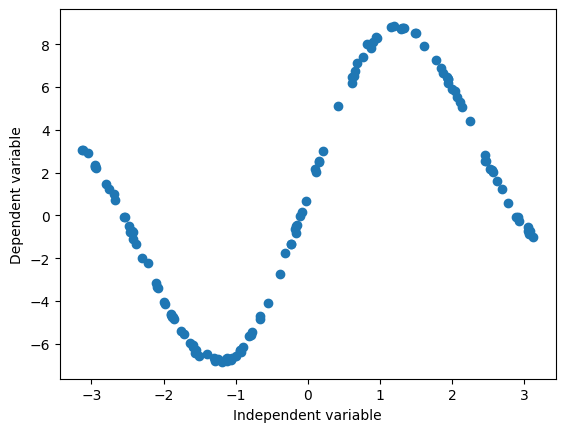

In [135]:
plt.scatter(X,Y)
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

In [103]:
# get the x data and y data
X=np.array(train_df[0]).reshape(-1,1)
Y=np.array(train_df[1]).reshape(-1,1)

In [105]:
x_test=np.array(test_df[0])
y_test=np.array(test_df[1])

### 1(a) Implement a linear regression learner to solve this best fit problem for 1 dimensional data. 

First we need to get a matrix that contains the basic functions at each depth e.g:

Example 1: d = 0

In this case, the basis function is simply 1.

The function to fit is:
$Y = θ0 * 1$

Example 2: d = 1

In this case, the basis functions are 1 and sin(0.5 * x). 

The function to fit is:
$Y = θ0 * 1 + θ1 * sin(0.5 * x)$

Example 3: d = 2

In this case, the basis functions are 1, sin(0.5 * x), and sin(0.5 * 2 * x). 

The function to fit is:
$Y = θ0 * 1 + θ1 * sin(0.5 * x) + θ2 * sin(0.5 * 2 * x)$

Example 4: d = 3

In this case, the basis functions are 1, sin(0.5 * x), sin(0.5 * 2 * x), and sin(0.5 * 3 * x). The function to fit is:

$Y = θ0 * 1 + θ1 * sin(0.5 * x) + θ2 * sin(0.5 * 2 * x) + θ3 * sin(0.5 * 3 * x)$

In [136]:

depth=[0,1,2,3]

# function to calculate the basic function
def get_matrix_basic_functions(x, k, d):
    matrix_basis = np.zeros((len(x), d))  # generate a matrix containing zeros and with dimensions of length of x and depth

    # Create the matrix of the sine functions
    for i in range(1, d + 1):
        matrix_basis[:, i - 1] = np.sin(i * k * x).flatten() # compute sine function for the different depths

    # Create the intercept term as a column of ones
    intercept = np.ones((len(x), 1))

    # Concatenate the intercept term and the basis functions
    matrix_basis = np.concatenate((intercept, matrix_basis), axis=1)
    
    print(matrix_basis)
    # create a list to input basic functions for all values of x at various depths
    basis_func_depth_0 = [sublist for sublist in matrix_basis if len(sublist) == 1]
    basic_func_depth_1 = [sublist for sublist in matrix_basis if len(sublist) == 2]
    basis_func_depth_2 = [sublist for sublist in matrix_basis if len(sublist) == 3]
    fbasis_func_depth_3 = [sublist for sublist in matrix_basis if len(sublist) == 4]
    
    return matrix_basis


# create a linear regression model and fit in the data
def linear_regressionn_learner(x, y, k, d):
    
    x_features = get_matrix_basic_functions(x, k, d)
    lr = LinearRegression()
    lr.fit(x_features, y)
    y_pred = lr.predict(x_features)
    return y_pred


 ### Q(b) Implement a  Essentially implement Linear Regression from scratch

We are going to repeat the process to get the matrix containing basic function for different depths then calculate the theta values.


$y_i=xi\begin{bmatrix}
 1&  &  &  \\
 1& sin(0.5 * x) &  &  \\
 1&  sin(0.5 * x)& sin(0.5 * 2 * x) &  \\
 1&  sin(0.5 * x)& sin(0.5 * 2 * x) & sin(0.5 * 3 * x)
\end{bmatrix}*\begin{bmatrix}
 \Theta_0\\
 \Theta_1\\
 \Theta_2\\
\Theta_3
\end{bmatrix}$



In [137]:
# craete a function to get the marix containing the basic functions
def get_matrix_basic_functions(x, k, d):
    matrix_basis = np.zeros((len(x), d))  # Generate a matrix containing zeros with dimensions of the length of x and depth

    # Create the matrix of basis functions (sine functions)
    for i in range(1, d + 1):
        matrix_basis[:, i - 1] = np.sin(i * k * x).flatten()  # Compute sine function for the different depths

    # Create the intercept term as a column of ones
    intercept = np.ones((len(x), 1))

    # Concatenate the intercept term and the basis functions
    matrix_basis = np.concatenate((intercept, matrix_basis), axis=1)

    return matrix_basis

def calculate_theta(x, y, d, k):
    # Create the design matrix
    x_features = get_matrix_basic_functions(x, k, d)

    # Perform linear regression using the closed-form solution
    theta = np.linalg.inv(x_features.T @ x_features) @ x_features.T @ y

    return theta

def calculate_y_predict(x, theta, d, k):
    # Create the design matrix for prediction
    x_features = get_matrix_basic_functions(x, k, d)

    # Make predictions
    predictions = x_features @ theta

    return predictions

### 1(c) Apply your regression learner to the data set that was generated and plot the  “function depth” 0, 1, 2, and 3.

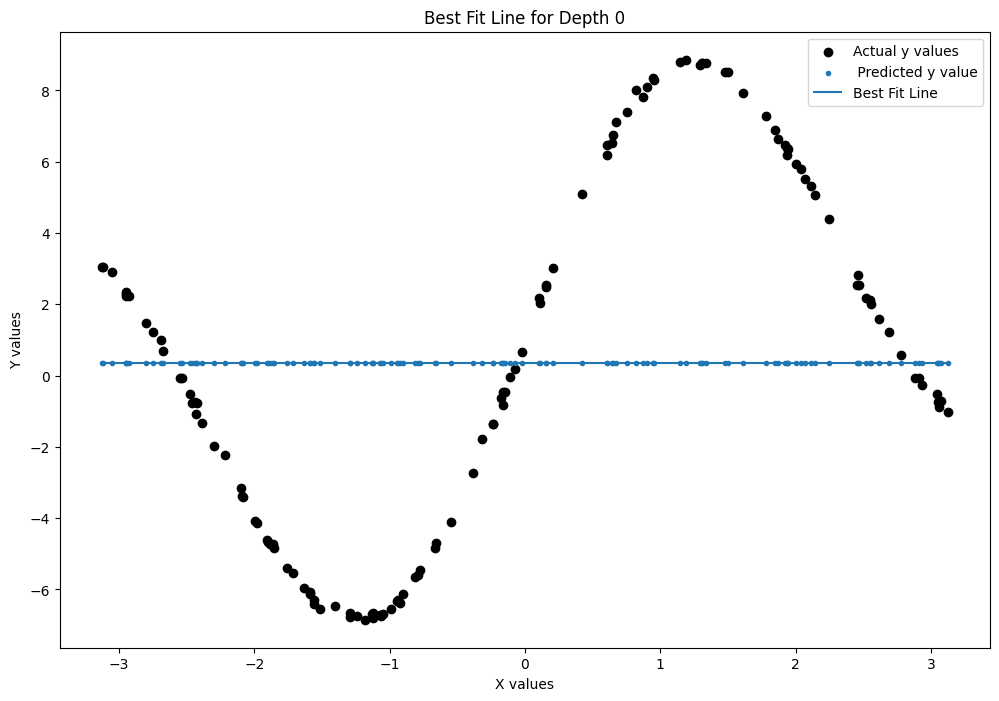

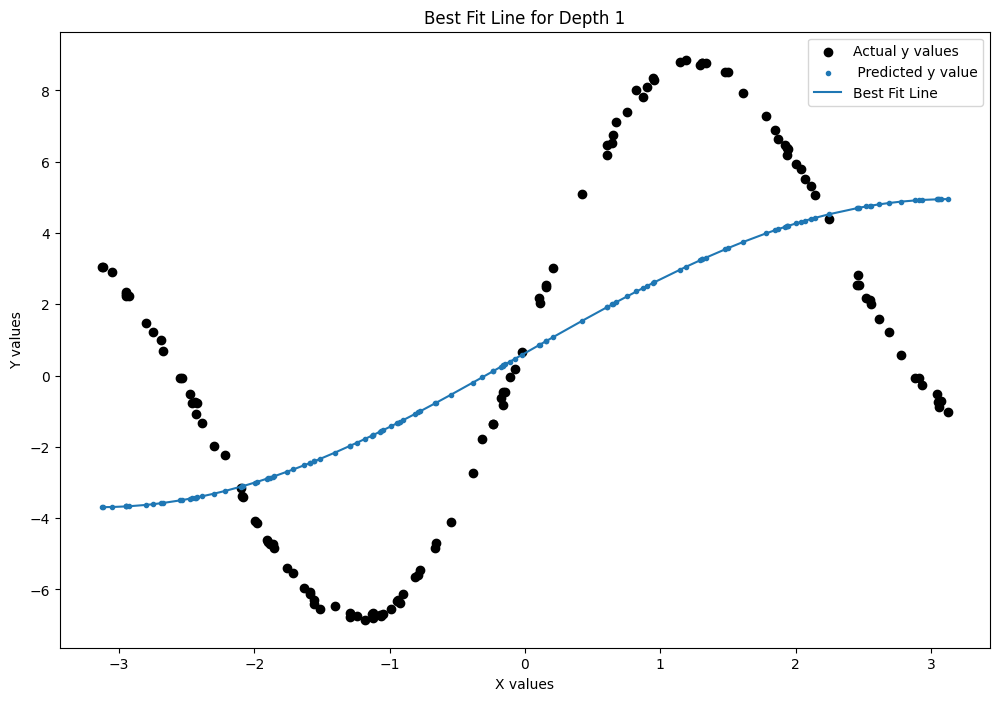

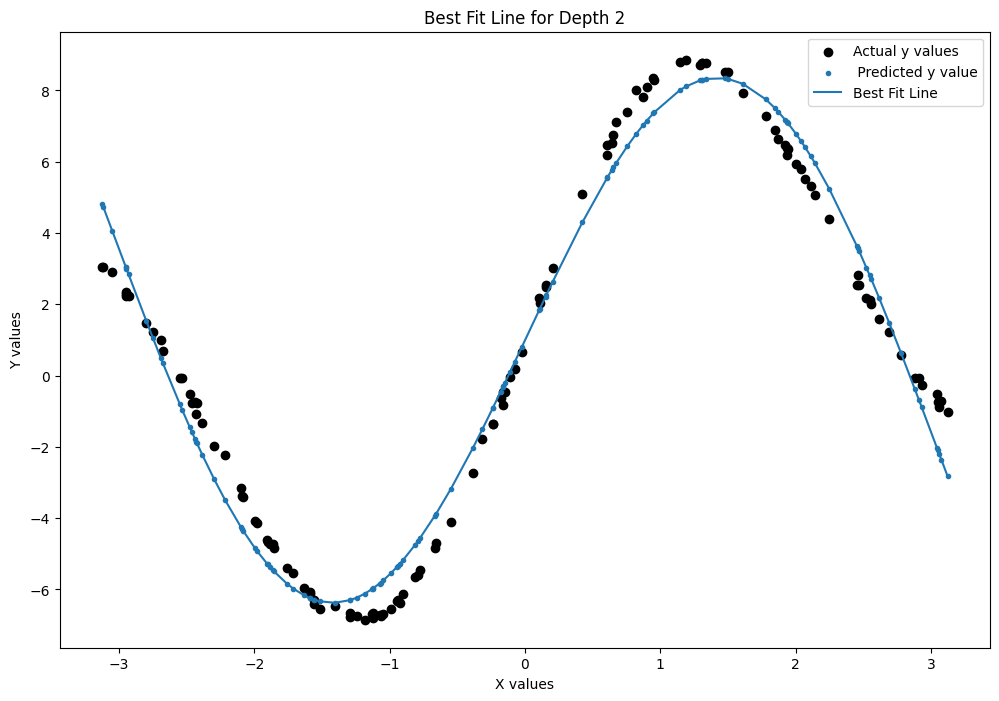

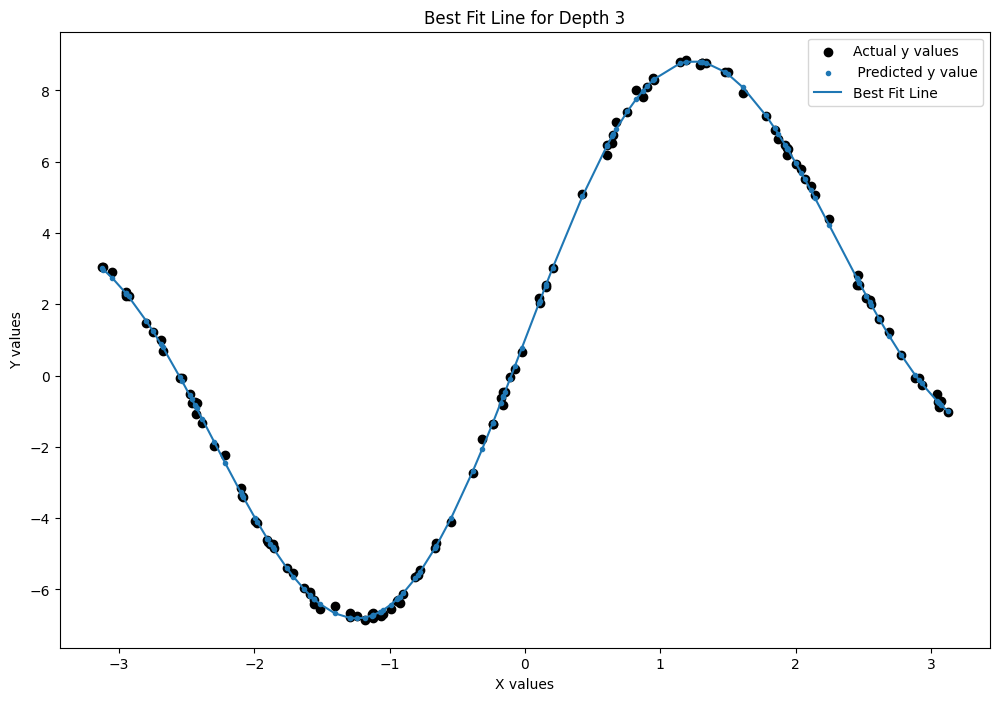

In [145]:
# Loop through different depths
for d in range(4):
    theta = calculate_theta(X, Y, d, k=0.5)
    Y_pred = calculate_y_predict(X, theta, d, k=0.5)
    
    # sort the values of x and y
    sorted_data = sorted(zip(X, Y_pred), key=lambda x: x[0])
    X_sorted, Y_pred_sorted = zip(*sorted_data)
    
    # Plot X and observed Y values for each depth
    plt.figure(figsize=(12, 8))
    plt.scatter(X, Y, label="Actual y values", color='black')

    
    plt.scatter(X, Y_pred, label=" Predicted y value", marker='.')
    plt.plot(X_sorted, Y_pred_sorted, linestyle='-', label="Best Fit Line")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.title(f"Best Fit Line for Depth {d}")
    plt.show()


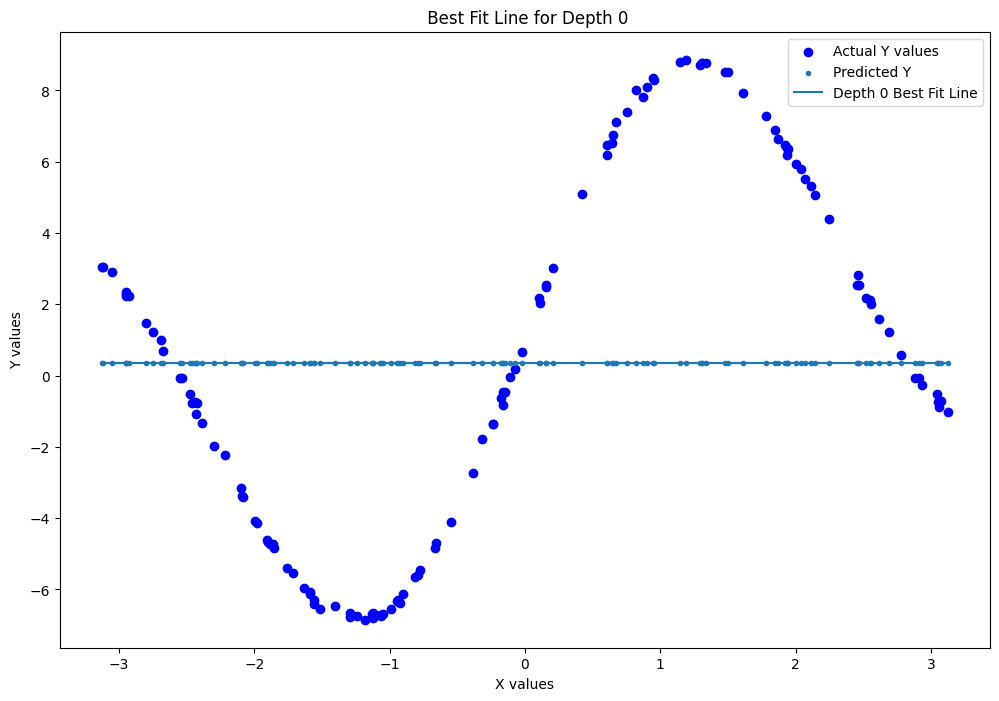

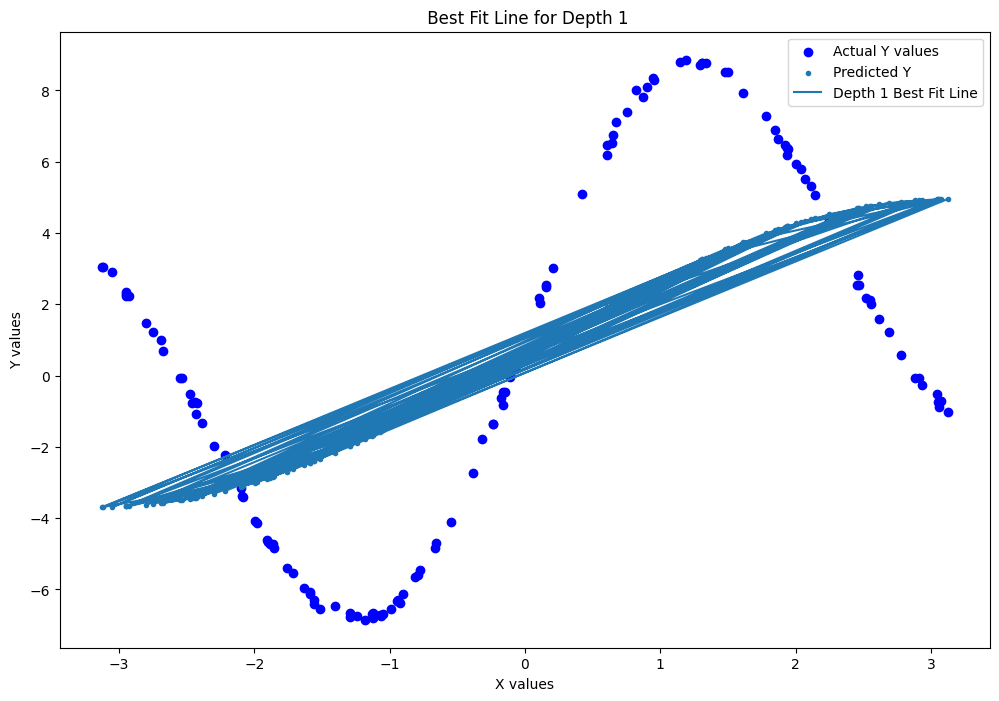

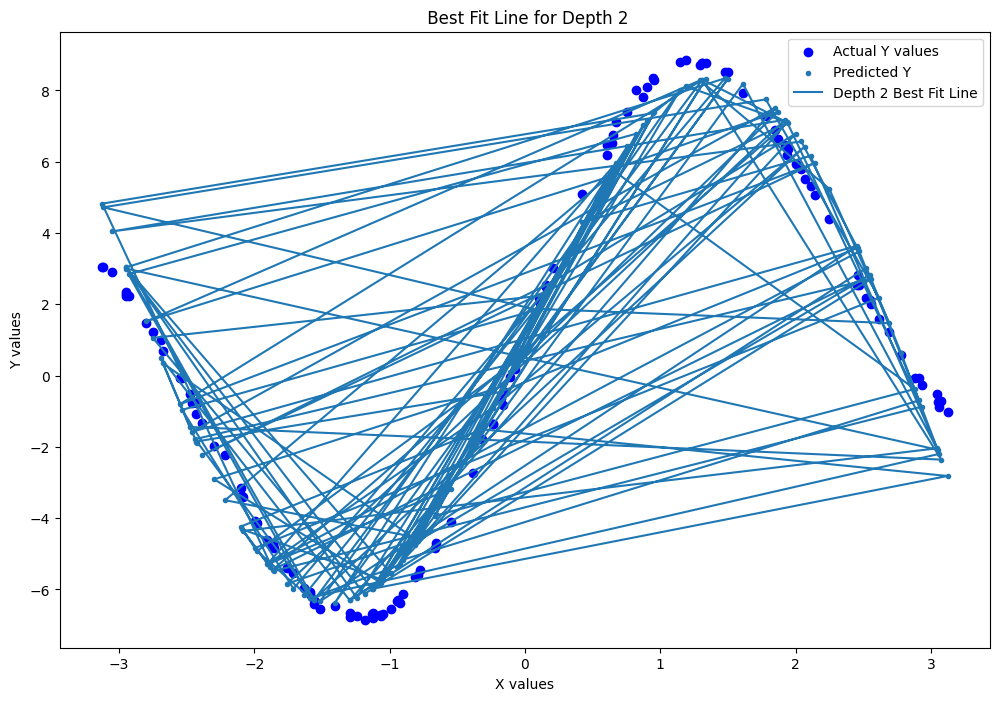

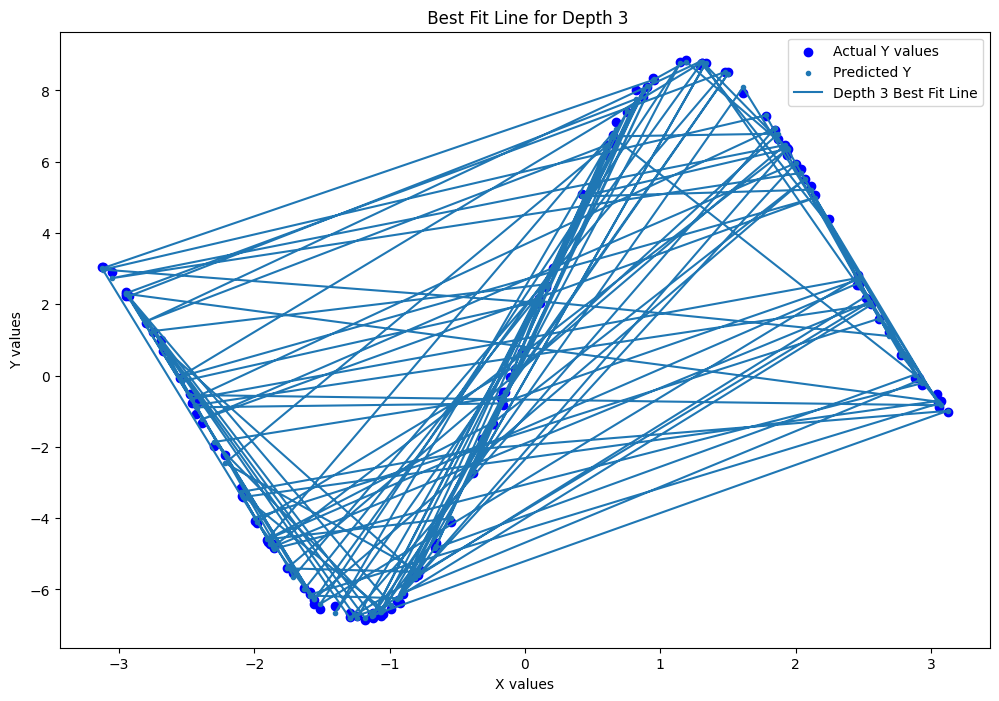

In [146]:
# Initialize a list to store the results for different depths
results = []

# Loop through different depths
for d in range(4):
    theta = calculate_theta(X, Y, d, k=0.5)
    Y_pred = calculate_y_predict(X, theta, d, k=0.5)
    results.append((d, Y_pred))

    # Plot X and observed Y values
    plt.figure(figsize=(12, 8))
    plt.scatter(X, Y, label="Actual Y values", color='blue')

    # Plot predicted Y values as dots
    plt.scatter(X, Y_pred, label=f"Predicted Y", marker='.')

    # Plot the best-fit line
    plt.plot(X, Y_pred, linestyle='-', label=f"Depth {d} Best Fit Line")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.title(f" Best Fit Line for Depth {d}")
    plt.show()


1(d)

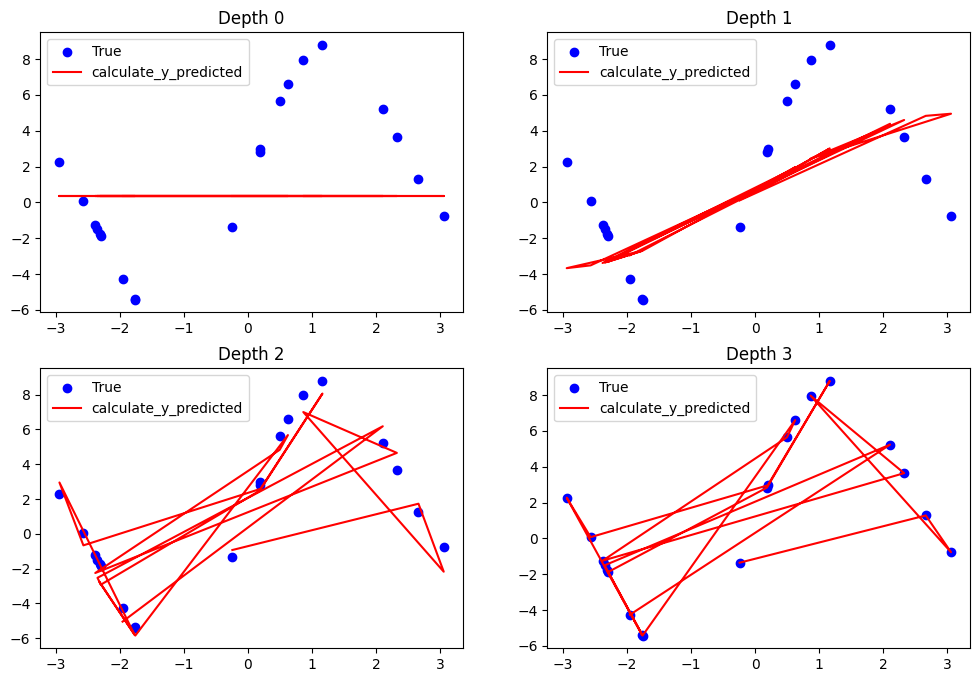

In [123]:

# Test the code for different values of d
depths = [0, 1, 2, 3]
x_test = x_test.reshape(-1, 1)  # Example test data
y_test = calculate_y_predict(x_test, calculate_theta(X, Y, d=3, k=0.5), d=3, k=0.5)  # Example calculate_y_prediction

# Plot the results
plt.figure(figsize=(12, 8))
for d in depths:
    theta = calculate_theta(X, Y, d=d, k=0.5)
    y_pred = calculate_y_predict(x_test, theta, d, k=0.5)

    # Plot the results
    plt.subplot(2, 2, d + 1)
    plt.scatter(x_test, y_test, color='blue', label='True')
    plt.plot(x_test, y_pred, color='red', label='calculate_y_predicted')
    plt.title(f'Depth {d}')
    plt.legend()

plt.show()
